<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 24px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Welcome to this notebook!</p>
</div>

<div style="background-color: #AAD7D9; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">For Training Data</p>
</div>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> Importing libraries </span></b>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import re
import nltk
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Loading the csv file</span></b>

In [2]:
df=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Shape of the Dataset</span></b>

In [4]:
df.shape

(7613, 5)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Removing unnecessary columns</span></b>

In [5]:
df.drop(columns=['id', 'keyword','location'], axis=1, inplace=True)

In [6]:
df.shape

(7613, 2)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Dataset information</span></b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Checking null values</span></b>

In [8]:
df.isnull().sum()

text      0
target    0
dtype: int64

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Checking duplicated values</span></b>

In [9]:
df.duplicated().sum()

92

### Drop the duplicates

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 28px; border-left: 8px solid #A9A9A9">Labeled Column</span></b>

In [12]:
df['target'].value_counts()

target
0    4315
1    3206
Name: count, dtype: int64

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">Countplot</span></b>

<Axes: xlabel='target', ylabel='count'>

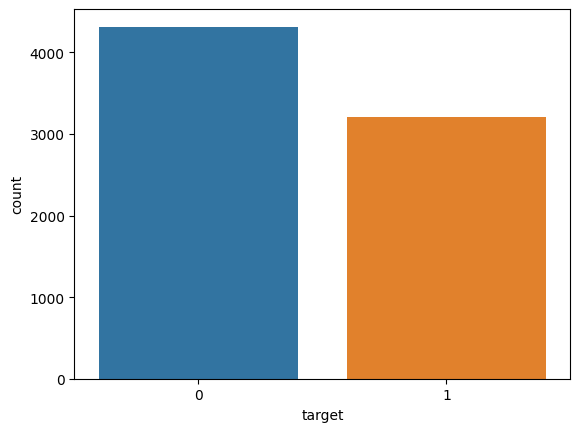

In [13]:
sn.countplot(x=df['target'])

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 28px; border-left: 8px solid #A9A9A9">Word Cloud</span></b>

In [14]:
disaster=''.join(df[df['target']==1]['text'])
normal=''.join(df[df['target']==0]['text'])

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 20px; border-left: 8px solid #FF9800">For Disaster Tweets</span></b>

(-0.5, 799.5, 399.5, -0.5)

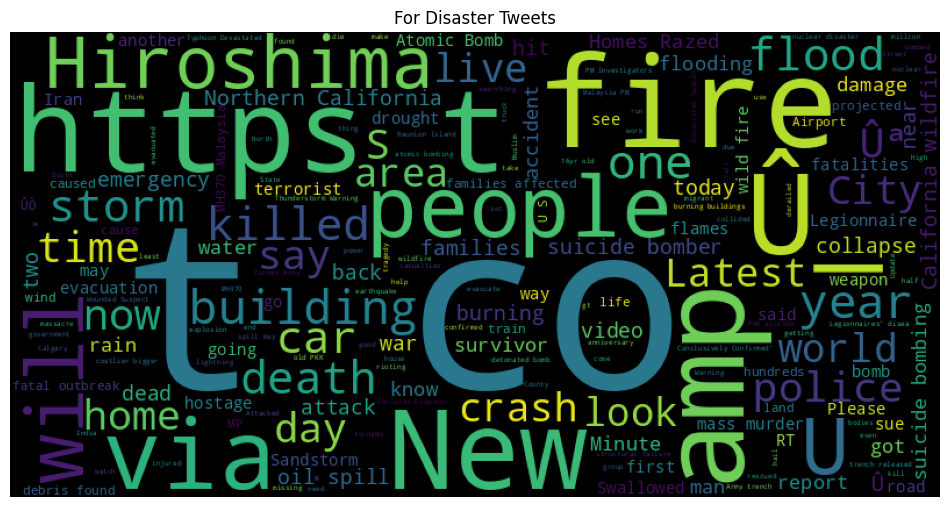

In [15]:
plt.figure(figsize=(12,8))

disaster_show=WordCloud(width=800, height=400, background_color='black').generate(disaster)

plt.imshow(disaster_show)
plt.title('For Disaster Tweets')
plt.axis('off')

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 20px; border-left: 8px solid #FF9800">For Normal Tweets</span></b>

Text(0.5, 1.0, 'For Normal Tweets')

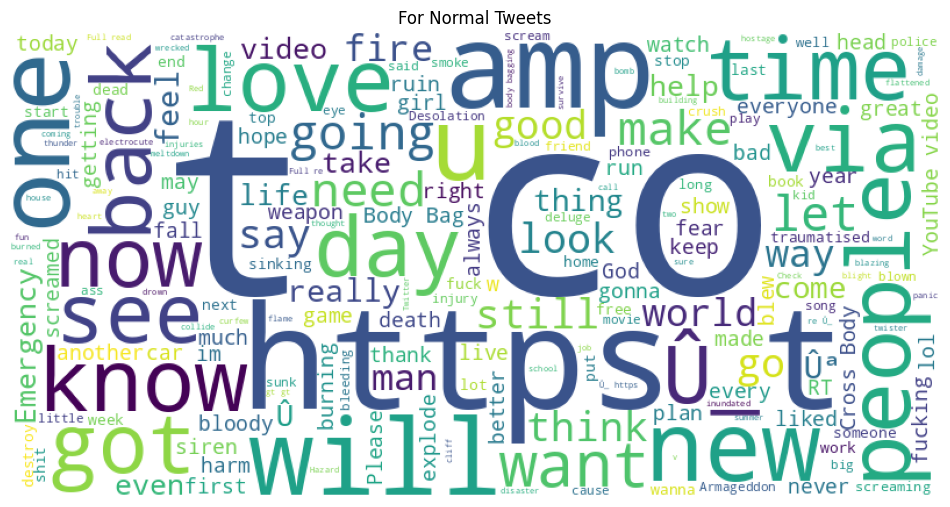

In [16]:
plt.figure(figsize=(12,8))
normal_show=WordCloud(width=800, height=400, background_color='white').generate(normal)

plt.imshow(normal_show)
plt.axis('off')
plt.title('For Normal Tweets')

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 28px; border-left: 8px solid #A9A9A9">Text Preprocessing</span></b>

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+', '', text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\W', ' ', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    
    return text

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Apply this to original text column</span></b>

In [19]:
df['text']=df['text'].apply(preprocess_text)

In [20]:
df['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13 000 people receive wildfires evacuation ord...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7604    worldnews fallen powerlines link tram update f...
7605    flip side walmart bomb everyone evacuate stay ...
7606    suicide bomber kills 15 saudi security site mo...
7608    two giant cranes holding bridge collapse nearb...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7521, dtype: object

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">As you can see our dataset is cleaned and ready.</span></b>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Train Test Split</span></b>

In [21]:
X=df['text']
Y=df['target']

In [22]:
print(X)

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13 000 people receive wildfires evacuation ord...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7604    worldnews fallen powerlines link tram update f...
7605    flip side walmart bomb everyone evacuate stay ...
7606    suicide bomber kills 15 saudi security site mo...
7608    two giant cranes holding bridge collapse nearb...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7521, dtype: object


In [23]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
7604    1
7605    1
7606    1
7608    1
7612    1
Name: target, Length: 7521, dtype: int64


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7521,) (6016,) (1505,)


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Text Vectorization</span></b>

In [26]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [27]:
X_train

<6016x14679 sparse matrix of type '<class 'numpy.float64'>'
	with 54585 stored elements in Compressed Sparse Row format>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Model Training</span></b>

<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 22px; border-left: 8px solid F037A5">i) Logistic Regression</span></b>

In [28]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

### Accuracy Score

In [29]:
print('Training Accuracy: ',lr.score(X_train,Y_train))
print('Testing Accuracy: ',lr.score(X_test,Y_test))

Training Accuracy:  0.887466755319149
Testing Accuracy:  0.7873754152823921


<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 22px; border-left: 8px solid F037A5">ii) Naive Bayes</span></b>

In [30]:
nb=MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

### Accuracy Score

In [31]:
print('Training Accuracy: ',nb.score(X_train,Y_train))
print('Testing Accuracy: ',nb.score(X_test,Y_test))

Training Accuracy:  0.9027593085106383
Testing Accuracy:  0.7847176079734219


<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 22px; border-left: 8px solid F037A5">iii) XGboost classifier</span></b>

In [32]:
xgb= XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Accuracy

In [33]:
print('Training Accuracy: ',xgb.score(X_train,Y_train))
print('Testing Accuracy: ',xgb.score(X_test,Y_test))

Training Accuracy:  0.8578789893617021
Testing Accuracy:  0.7514950166112957


<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 22px; border-left: 8px solid F037A5">iv) Light Gradient Boosting Classifier</span></b>

In [34]:
gbm=LGBMClassifier()
gbm.fit(X_train,Y_train)

LGBMClassifier()

In [35]:
print('Training Accuracy: ',gbm.score(X_train,Y_train))
print('Testing Accuracy: ',gbm.score(X_test,Y_test))

Training Accuracy:  0.8513962765957447
Testing Accuracy:  0.7661129568106312


<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 22px; border-left: 8px solid F037A5">iv)Support Vector Machine</span></b>

In [36]:
sv=SVC()
sv.fit(X_train,Y_train)

SVC()

### Accuracy

In [37]:
print('Training Accuracy: ',sv.score(X_train,Y_train))
print('Testing Accuracy: ',sv.score(X_test,Y_test))

Training Accuracy:  0.9702460106382979
Testing Accuracy:  0.7900332225913621


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Evaluate the model --> SVC</span></b>

### Classification Report

In [38]:
report =classification_report(Y_test, sv.predict(X_test))

print(report)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       817
           1       0.88      0.63      0.73       688

    accuracy                           0.79      1505
   macro avg       0.81      0.78      0.78      1505
weighted avg       0.81      0.79      0.78      1505



<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 20px; border-left: 8px solid #A9A9A9">Saving the model</span></b>

In [39]:
import pickle
import joblib


with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

In [40]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

<div style="background-color: #AAD7D9; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Kaggle Submission</p>
</div>

In [41]:
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [42]:
X_submission = test['text']


X_submission_preprocess=test['text'].apply(preprocess_text)

X_submission_vectorized = tfidf.transform(X_submission_preprocess)

# Make predictions on the test set
y_submission_pred = sv.predict(X_submission_vectorized)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 20px; border-left: 8px solid #A9A9A9">Create a DataFrame for submission</span></b>

In [43]:
submission_df = pd.DataFrame({
    'id': test['id'],
    'target': y_submission_pred
})

# Save the submission file
submission_path = '/kaggle/working/submission.csv'
submission_df.to_csv(submission_path, index=False)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 20px; border-left: 8px solid #A9A9A9">Display the submission DataFrame</span></b>

In [44]:
submission_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 22px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Thank you for Exploring my notebook.</p>
</div>